In [63]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
# import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.utils.data as data

from PIL import Image
import numpy as np
import shutil
import datetime

import matplotlib.pyplot as plt

import models.segmentation_models as segmentation_models

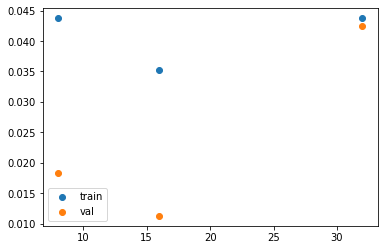

In [67]:
conv1_outdim = 1
conv1_outdims = [8]
conv2_outdims = [32]
dialations = [8, 16, 32]
train_losses = []
val_losses = []
for conv2_outdim in conv2_outdims:
    for conv1_outdim in conv1_outdims:
        for dialation in dialations:
            model_file = './trained_models/model_three_layer_semseg_net_highdim_conv1_outdim_{}_conv2_outdim_{}_dialation_{}_epochs_40_batcheff_16_lr_0.05_momentum_0.5_aug_noise.tar'.format(conv1_outdim, conv2_outdim, dialation)
            train_loss_file = './model_losses/train-loss_model_three_layer_semseg_net_highdim_conv1_outdim_{}_conv2_outdim_{}_dialation_{}_epochs_40_batcheff_16_lr_0.05_momentum_0.5_aug_noise.npy'.format(conv1_outdim, conv2_outdim, dialation)
            val_loss_file = './model_losses/val-loss_model_three_layer_semseg_net_highdim_conv1_outdim_{}_conv2_outdim_{}_dialation_{}_epochs_40_batcheff_16_lr_0.05_momentum_0.5_aug_noise.npy'.format(conv1_outdim, conv2_outdim, dialation)
            train_loss = np.load(train_loss_file)
            val_loss = np.load(val_loss_file)
            train_losses.append(train_loss[-1])
            val_losses.append(val_loss[-1])
plt.scatter(dialations, train_losses, label='train')
plt.scatter(dialations, val_losses, label='val')
plt.legend()

In [53]:
conv1_outdim = 32
model_file = './trained_models/model_three_layer_semseg_net_highdim_first_layer_outdim_{}_epochs_45_batcheff_16_lr_0.05_momentum_0.5_aug_noise-blur-brightness-contrast.tar'.format(conv1_outdim)

model =  segmentation_models.ThreeLayerSemSegNetHighDim(1, 2, conv1_outdim)
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

In [54]:
conv1_weights = np.squeeze(model.conv1.weight.data.numpy(), axis=1)

minval -0.9810277819633484, maxval 0.6754358410835266


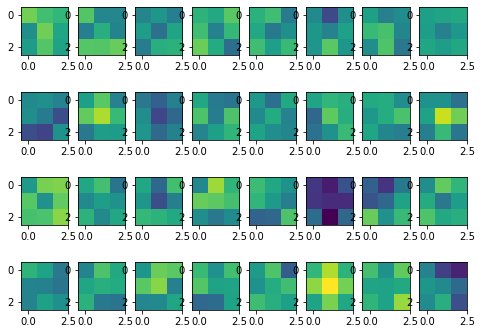

In [55]:
num_rows = 4

num_filters = conv1_weights.shape[0]
num_cols = np.ceil(num_filters/num_rows).astype(int) 
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 6))

max_weight = conv1_weights.max()
min_weight = conv1_weights.min()

for dim in range(num_filters):
    if num_cols == 1:
        axs[dim].imshow(conv1_weights[dim], vmin=min_weight, vmax=max_weight)
    else:
        row = dim // num_cols
        col = dim % num_cols
        axs[row, col].imshow(conv1_weights[dim], vmin=min_weight, vmax=max_weight)
print('minval {}, maxval {}'.format(min_weight, max_weight))

In [51]:
conv1_outdims = [1]
train_loss = [0.7646]
val_loss = []